This notebook is an introduction to the library scikit-learn (https://scikit-learn.org/stable/), which provides numerous tools to easily perform machine learning tasks. 

In this lab, we'll experiment with two of the most frequently encountered tasks in machine learning : 
  - Regression : predicting a continuous variable given a set of predictors. 
  - Classification : predicting the class of a sample given a set of predictors.

In order for you to first have a good feeling of the general pipeline of a machine learning task, we'll experiment with two simple models : a linear regression, and a K-nearest neighbors classifier. 

**Import necessary libraries**

In [75]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, precision_score, recall_score, accuracy_score, confusion_matrix, \
    roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

**Load the 'Pokemon.csv' dataset as a pandas dataframe, change the Type 1 and Type 2 variables to categorical and replace 'Type 2' missing values (replace by the value of 'Type 1').**

In [76]:
file = 'Pokemon.csv'

##Read dataframe##

df = pd.read_csv(file)
print(df.head())

   #                   Name Type 1  ... Speed  Generation  Legendary
0  1              Bulbasaur  Grass  ...    45           1      False
1  2                Ivysaur  Grass  ...    60           1      False
2  3               Venusaur  Grass  ...    80           1      False
3  3  VenusaurMega Venusaur  Grass  ...    80           1      False
4  4             Charmander   Fire  ...    65           1      False

[5 rows x 13 columns]


In [77]:
##Change variables types##

print(df.dtypes)
df.astype({'Type 1': 'category', 'Type 2': 'category'})

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [78]:
##Check for any missing values, replace them accordingly or remove the associated rows###

print(df.isna().sum())
df['Type 2'].fillna(df['Type 1'], inplace=True)

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64


In [79]:
print(df.isna().sum())

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64


**Select the target variable y as 'HP' and the predictor as 'Attack', split the dataset in a train and a test set with a 0.8/0.2 ratio.**

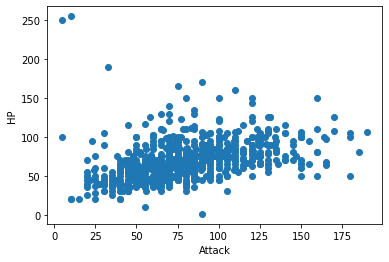

((640, 1), (640,)) ((160, 1), (160,))


In [80]:
##Select a target variable y and a predictor x. Reshape the data x to [num_samples, 1]##

y = df['HP'].values
x = df['Attack'].values
X = x[:, np.newaxis]
fig, ax = plt.subplots()

ax.scatter(x,y)
ax.set_xlabel('Attack')
ax.set_ylabel('HP')
plt.show()

##Define a training set and a validation set##

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=True)
print((X_train.shape, y_train.shape), (X_test.shape, y_test.shape))

**Build a linear regression model and fit it to the training data.**

In [81]:
##Define the linear regression model, and reshape the data x to [num_samples, 1]##

model = LinearRegression(fit_intercept=True)

##Fit the model to the training data##

model.fit(X_train,y_train)

LinearRegression()

**Get the model's parameters, and compute the coefficient of determination and the mean square error on both the training and test sets.**

In [82]:
##Get the model's parameters##

print('Model\'s coefficients : {}'.format(model.coef_))
print('Model\'s intercept : {}'.format(model.intercept_))

Model's coefficients : [0.28936733]
Model's intercept : 46.160266171185626


In [83]:
##Make predictions for both the training and the test sets##

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

##Compute th coefficient of determination and the mean square error on both sets##

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
R2_train = model.score(X_train, y_train)
R2_test = model.score(X_test, y_test)

print('MSE on training set : {}'.format(MSE_train))
print('R2 on training set : {}'.format(R2_train))
print('MSE on test set : {}'.format(MSE_train))
print('R2 on test set : {}'.format(R2_test))

MSE on training set : 545.3210184939704
R2 on training set : 0.14071187533206564
MSE on test set : 545.3210184939704
R2 on test set : 0.29218208956238256


**Plot the regression line**

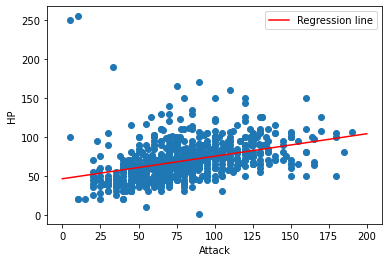

In [84]:
##Generate predictions out of the fitted model##

xfit = np.linspace(0,200)
xfit = xfit[:, np.newaxis]
yfit = model.predict(xfit)

##Plot the regression line##

fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('Attack')
ax.set_ylabel('HP')
ax.plot(xfit, yfit, label='Regression line', color='red')
ax.legend()
plt.show()

**Your turn !**

**1) Do the same as above, but now include 'Defense' as a second predictor.**

In [85]:
##1##

##Extract the 'Attack' and 'Defense' as predictors and 'HP' as the targt variable##

X = df[['Attack', 'Defense']].values 
y = df['HP'].values 
x = df['Attack'].values

##Split the dataset in a train and test split##

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2, shuffle=True)

In [86]:
##Fit the model to the training data##

model.fit(X_train,y_train)

##Get the model's coefficients##

coef = model.coef_
intercept = model.intercept_

print('Model\'s coefficients : {}'.format(coef))
print('Model\'s intercept : {}'.format(intercept))

Model's coefficients : [0.3116537 0.0363061]
Model's intercept : 42.37750647466131


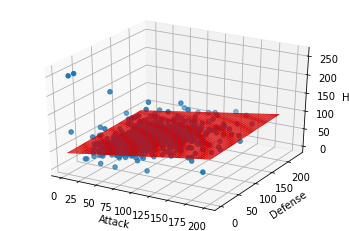

In [87]:
##Plot the regression plane##

z = df['Defense']
xf = np.linspace(0,200)
zf = np.linspace(0,200)
xx, zz = np.meshgrid(xf, zf)

xx_new = xx.flatten()[:,np.newaxis]
zz_new = zz.flatten()[:,np.newaxis]

Xfit = np.concatenate((xx_new,zz_new), axis=-1)
yfit = model.predict(Xfit)
yfit = yfit[:,np.newaxis].reshape(xx.shape[0], xx.shape[1])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x,z,y)
ax.plot_surface(xx,zz,yfit, color='red')
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')

plt.show()

In [88]:
##Predict on the training and test sets##

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

##Compute the coefficient of determination and the means square error on both training and test sets##

MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
R2_train = model.score(X_train, y_train)
R2_test = model.score(X_test, y_test)


print('R2 on training set : {}'.format(R2_train))
print('R2 on test set : {}'.format(R2_test))
print('MSE on training set : {}'.format(MSE_train))
print('MSE on test set : {}'.format(MSE_test))

R2 on training set : 0.16855375304500464
R2 on test set : 0.23442389679184927
MSE on training set : 549.0761217704516
MSE on test set : 469.3286546894586


**Let's now experiment with classification. Select the variables 'HP', 'Attack' and 'Defense' as predictors, and 'Legendary' as the target variable.**

**2) Apply the same methodology as above, but this time use the KNeighborsClassifier of the sklearn library to predict whether a Pokemon is legendary or not. Set the number of neighbors to 5.**

**3) Create functions that, given arrays of true class labels and predicted labels, compute :**

*   **a) The accuracy**
*   **b) The recall score**
*   **c) The precision score**
*    **d) The confusion matrix**
*   **e) The F1-score**

**Compare the result of your implementation of these metrics on predictions for the training and test sets to the methods of the sklearn library.**



In [90]:
###2###

##Select 'HP', 'Defense' and 'Attack' as predictors, and 'Legendary' as the target variables## 

X = df[['HP', 'Defense', 'Attack']].values
y = df['Legendary'].astype(int).values

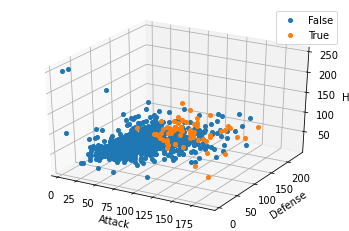

In [91]:
##Plot the data per class##

data = df[['Attack', 'Defense', 'HP', 'Legendary']]
groups = df.groupby('Legendary')

fig = plt.figure()
ax = plt.axes(projection='3d')

for name, group in groups:
    ax.plot(group.Attack, group.Defense, group.HP , marker='o', linestyle='', ms=4, label=name)
ax.legend()
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')
ax.set_zlabel('HP')
plt.show()

In [92]:
##Split the dataset in a training and test set##

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=True)

##Build the KNeighbors classifier and set the number of neighbors to 5##

n_neighbors = 5
model = KNeighborsClassifier(n_neighbors=n_neighbors)

##Fit the model to the training data##

model.fit(X_train, y_train)

##Predict the target variable for the training and test sets##

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [93]:
###3###

#The accuracy is defined as (tp + tn)/(tp + tn + fp + fn) 
#The precision is defined as tp/(tp + fp)
#The recall is defined as tp/(tp + fn)
#The F1 score is defined as (2 * precision * recall)/(precision + recall)
#The confusion matrix is a 2x2 matrix containing tn, fp, fn, tp

#tn is number of true negatives (when the model predicts 0 when it is indeed 0)
#tp is the number of true positives (when the model predicts 1 when it is indeed 1)
#fn is the number of false negatives (when the model predicts 0, but it should have predicted 1)
#fp is the number of false positives (when the model predictes 1, but it should have predicted 0)

def accuracy(y_true, y_pred):
    score = 0
    for i, elem in enumerate(y_true):
        if elem == y_pred[i] :
            score += 1
    return score/len(y_true)


def precision(y_true, y_pred):
    tp = 0
    fp = 0
    for i, elem in enumerate(y_true):
        if elem == 1 and elem == y_pred[i]:
            tp +=1
        elif elem == 0 and elem != y_pred[i]:
            fp +=1
    return tp/(tp+fp)

def recall(y_true, y_pred):
    tp = 0
    fn = 0
    for i, elem in enumerate(y_true):
        if elem == 1 and elem == y_pred[i]:
            tp += 1
        elif elem == 1 and elem != y_pred[i]:
            fn += 1
    return tp/(tp + fn)

def conf_matrix(y_true, y_pred):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i, elem in enumerate(y_true):
        if elem == 1 and elem == y_pred[i]:
            tp += 1
        elif elem == 0 and elem != y_pred[i]:
            fp += 1
        elif elem == 0 and elem == y_pred[i]:
            tn += 1
        else:
            fn += 1
    return tn, fp, fn, tp

def f1(y_true, y_pred):
    prec = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    return 2 * rec * prec/(rec + prec)

##Compute metrics for the training set##

acc_train_1 = accuracy(y_train_true, y_train_pred)
precision_train_1 = precision(y_train_true, y_train_pred)
recall_train_1 = recall(y_train_true, y_train_pred)
confusion_m_train_1 = conf_matrix(y_train_true, y_train_pred)
f1_train_1 = f1(y_train_true, y_train_pred)

acc_train_2 = accuracy_score(y_train_true, y_train_pred)
precision_train_2 = precision_score(y_train_true, y_train_pred)
recall_train_2  = recall_score(y_train_true, y_train_pred)
confusion_m_train_2 = confusion_matrix(y_train_true, y_train_pred).ravel()
f1_train_2 = f1_score(y_train_true, y_train_pred)

print('Train Accuracy : {}'.format(acc_train_2))
print('Train Precision : {}'.format(precision_train_2))
print('Train Recall : {}'.format(recall_train_2))
print('Train confusion matrix : {}'.format(confusion_m_train_2))
print('Train F1 : {}'.format(f1_train_2))


##Compute metrics for the test set##

acc_test_1 = accuracy(y_test_true, y_test_pred)
precision_test_1 = precision(y_test_true, y_test_pred)
recall_test_1 = recall(y_test_true, y_test_pred)
confusion_m_test_1 = conf_matrix(y_test_true, y_test_pred)
f1_test_1 = f1(y_test_true, y_test_pred)

acc_test_2 = accuracy_score(y_test_true, y_test_pred)
precision_test_2 = precision_score(y_test_true, y_test_pred)
recall_test_2  = recall_score(y_test_true, y_test_pred)
confusion_m_test_2 = confusion_matrix(y_test_true, y_test_pred).ravel()
f1_test_2 = f1_score(y_test_true, y_test_pred)

print('\nTest Accuracy : {}'.format(acc_test_2))
print('Test Precision : {}'.format(precision_test_2))
print('Test Recall : {}'.format(recall_test_2))
print('Test confusion matrix : {}'.format(confusion_m_test_2))
print('Test F1 : {}'.format(f1_test_2))

Train Accuracy : 0.8875
Train Precision : 0.05263157894736842
Train Recall : 0.01818181818181818
Train confusion matrix : [567  18  54   1]
Train F1 : 0.027027027027027025

Test Accuracy : 0.91875
Test Precision : 0.2
Test Recall : 0.1
Test confusion matrix : [146   4   9   1]
Test F1 : 0.13333333333333333


Lets look at the distribution of the target variable "Legendary". 

0    735
1     65
Name: Legendary, dtype: int64


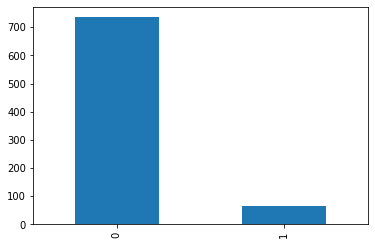

In [94]:
df['Legendary'].astype(int).value_counts().plot(kind='bar')
print(df['Legendary'].astype(int).value_counts())

As you can see, the two classes are highly imbalanced, with a vast majority of Pokemons belonging to the non-legendary class. 

When dealing with imbalanced datasets, the accuracy can be very misleading. Indeed, suppose that we have a dataset which contains 90 samples belonging to the category '0' and 10 samples belonging to the category '1'. Even if my model always predicts '0' whatever the input, the accuracy would still reach 90%, even though it wrongly classified all the samples belonging to the '1' category. 

The precision and recall metrics specifically focus on the minority class (the class '1'), and are to be preferred when dealing with imbalanced datasets. Finally, the F1-score can be seen as an 'average' of the precision and the recall. 

But in the end, all these metrics are merely 'summaries' of the behavior of a classifier, and as a result, they do not always allow to grasp what is really happening. In this sense, computing the confusion matrix always remains the best way to get real insight on the behavior of a binary classifier. 